MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)
{'avgerage_arrival_delay': 7.545457931394093}


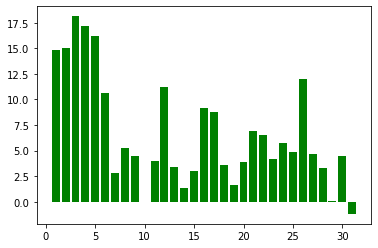

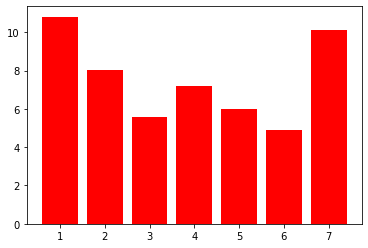

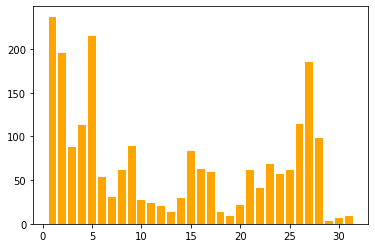

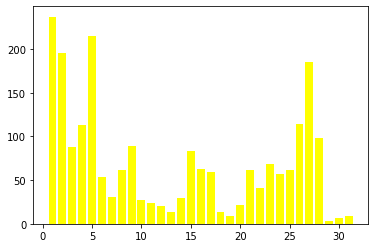

{}
max adn min {'max cancelation': 1, 'min cancelation': 0}


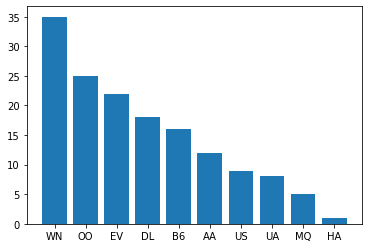

day_diversion {'_id': 'WN', 'total_counts': 11738}
day_diversion {'_id': 'DL', 'total_counts': 7989}
day_diversion {'_id': 'EV', 'total_counts': 5916}
day_diversion {'_id': 'OO', 'total_counts': 5708}
day_diversion {'_id': 'AA', 'total_counts': 5250}
day_diversion {'_id': 'UA', 'total_counts': 4701}
day_diversion {'_id': 'US', 'total_counts': 3925}
day_diversion {'_id': 'MQ', 'total_counts': 3502}
day_diversion {'_id': 'B6', 'total_counts': 2548}
day_diversion {'_id': 'AS', 'total_counts': 1586}
day_diversion {'_id': 'NK', 'total_counts': 1048}
day_diversion {'_id': 'F9', 'total_counts': 794}
day_diversion {'_id': 'HA', 'total_counts': 722}
day_diversion {'_id': 'VX', 'total_counts': 573}


In [7]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

def mongoimport(csv_path):
    
    # drop all documents   
    hr_df = pd.read_csv(csv_path)

    payload = json.loads(hr_df.to_json(orient = 'records'))
    collection.delete_many({})
    collection.insert_many(payload)

if __name__ == "__main__":
    client = MongoClient("mongodb://localhost:27017")
    print(client)
    #(A).Create collections "flights" inside database "airline_delayDB"
    db = client['airline_delayDB']
    collection = db['flights']
    mongoimport('E:/Flights_Delay.csv')

    # (B). average flight delay 

    avg_delay = collection.aggregate([
        {'$group' : {'_id' : 'null', 'avgerage_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}}, 
                    {'$project' : {'_id' : 0}}])
    
    for item in avg_delay:
        print(item)

   
    # c). Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]
    day_avg_delay=collection.aggregate([   {'$group': {'_id':'$DAY','total_avg': { '$avg':'$ARRIVAL_DELAY'}}}  ])
    dayys = {}
    for item in day_avg_delay:
        dayys.update({item['_id']: item['total_avg']})
        
        keys1 = dayys.keys()
        values1 =dayys.values()
    plt.bar(keys1, values1,color = 'green')
    plt.show()

    # d). Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]
    day_week=collection.aggregate([   {'$group': {'_id':'$DAY_OF_WEEK','total_avg': { '$avg':'$ARRIVAL_DELAY'}}}  ])
daywe  = {}
for item in day_week:
    daywe.update({item['_id'] :item['total_avg']})
keys2 = daywe.keys()
values2 = daywe.values()

plt.bar(keys2, values2,color = 'red')
plt.show()

# e). Arrange Days of month as per cancellations done in descending order.  [Create a suitable plot using matplotlib/seaborn]
day_cancel=collection.aggregate([
    {'$match':{'CANCELLED':1}},
     {'$group': {'_id': '$DAY','day_counts': { '$count':{}}}},
     {'$sort':{'DAY':-1}}])
day_co = {}
  
for item in day_cancel:
    day_co.update({item['_id']: item['day_counts']})
keys3 = day_co.keys()
values3 = day_co.values()

plt.bar(keys3, values3,color = 'orange')
plt.show()

# f). Find the busiest airports with respect to day of week. Create a suitable plot using matplotlib/seaborn.
busy_airport=collection.aggregate([
    {'$group': {'_id': '$ORIGIN_AIRPORT', 'max_day' : { '$max' : '$DAY_OF_WEEK'}}},{'$sort':{'max_day':1}},{'$limit': 20}])
og = {}

for item in busy_airport:
    og.update({item['_id'] :item['max_day']})

keys4 = day_co.keys()
values4 = day_co.values()

plt.bar(keys4, values4,color = 'yellow')
plt.show()

# # g). Find top 10 Airlines of US. Create a suitable plot using matplotlib/seaborn.
top_airlines=collection.aggregate([
    {'$match':{'AIRLINE':'US'}},
     {'$group': {'_id': 'null'}},
     {'$sort':{'AIRLINE':-1}},
     {'$limit':10},{'$project':{'_id':0}}])

for item in top_airlines:
    print(item)

# h). Finding airlines that make the maximum, minimum number of cancellations.
can_max_min=collection.aggregate([
    {'$group': {'_id': 'null', 'max cancelation' : { '$max' : '$CANCELLED'},
                                'min cancelation' : { '$min' : '$CANCELLED'}}} ,
    {'$project':{'_id':0}}])
for item in can_max_min:
    print("max adn min",item)    

# i). Find and show airlines names in descending that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]
diversion=collection.aggregate([  
                                {'$match':{'DIVERTED':1}},
                                {'$group': {'_id':'$AIRLINE','total_counts': { '$count':{}}}},
                                {'$sort':{'total_counts':-1}} ])
dict = {}                                
for item in diversion:
    dict.update({item['_id']: item['total_counts']})   
keys = dict.keys()
values  =dict.values()                

plt.bar(keys, values)
plt.show()

# j). Finding days of month that see the most number of diversion
day_diversion=collection.aggregate([   {'$group': {'_id':'$AIRLINE','total_counts': { '$count':{}}}},
                                    {'$sort':{'total_counts':-1}} ])
for item in day_diversion:
    print("day_diversion",item)       

